In [7]:
# Imports
from gensim import downloader as api
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')  # Punkt module is needed for NLTK's sentence tokenizer
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /Users/carmen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
# Task 1

# Load pre-trained model
model = api.load("word2vec-google-news-300") 

In [17]:
# Global Variables
correct = 0 # variable to count correct guess words
valid = 0 # variable to count valid guess words
label = "guess" # variable to label system's guess result
score_dict = {} # dictionary for score-word pairs


# Open synonym.csv in read mode
with open('synonym.csv', mode='r') as dataset:

    csv_reader = csv.reader(dataset, delimiter=',')
    linecount = 0 # variable to count number of lines
    
    # Open word2vec-google-news-300-details.csv in write mode
    with open('word2vec-google-news-300-details.csv', mode='w', newline='') as details:
        csv_writer = csv.writer(details)

        # For every row in synonym.csv
        for row in csv_reader:
            # csv Headings
            if linecount == 0:
                csv_writer.writerow(['question-word', 'answer-word', 'guess-word', 'label'])
            else:
                
                score_dict = {} # dictionary for score-word pairs
                inModel = True # variable used for checking valid guesses
                random_word = random.randint(2,5) # random integer between 2 and 5 (inclusive)

                # If either question-word or all four guess-words are not in model, guess randomly
                if(row[0] not in model or (row[2] not in model and row[3] not in model and row[4] not in model and row[5] not in model)):
                    inModel = False
                    guess_word = row[random_word]

                else: 
                    inModel = True

                    # Compute similarities of scores of question-word and guess-word and append them as key-value pairs to the dictionary
                    score1 = model.similarity(row[0],row[2])
                    score_dict[score1] = row[2]
                    
                    score2 = model.similarity(row[0],row[3])
                    score_dict[score2] = row[3]
                    
                    score3 = model.similarity(row[0],row[4])
                    score_dict[score3] = row[4]
                    
                    score4 = model.similarity(row[0],row[5])
                    score_dict[score4] = row[5]

                    guess_key = sorted(score_dict.keys())[-1] # sort the final dictionary and get the highest key (score)
                    guess_word = score_dict[guess_key] # get the word with the highest score

                # Label the system's guess
                if(inModel == False):
                    label = "guess"      
                elif(guess_word == row[1]):
                    correct += 1
                    valid += 1
                    label = "correct"
                else:
                    valid += 1
                    label = "wrong"

                csv_writer.writerow([row[0], row[1], guess_word, label]) # write final result to csv
            
            score_dict.clear() # clear the dictionary to use in the next row
            linecount +=1 # increase the line count

In [18]:
# Open analysis.csv in write mode
with open('analysis.csv', mode='w', newline='') as details:
        csv_writer = csv.writer(details)
        model_name = "word2vec-google-news-300"
        vocab_size = 3000000
        accuracy = correct/valid
        csv_writer.writerow(["Model Name", "Vocabulary Size", "Number of Correct Labels","Number of Valid Answers", "Model Accuracy \n"]) # csv Headings
        csv_writer.writerow([model_name, vocab_size, correct, valid, accuracy]) # analysis results
        csv_writer.writerow("")

In [19]:
# Task 2

# Load all pre-trained models
C1E1 = api.load("glove-wiki-gigaword-200")
C2E1 = api.load("glove-twitter-200")
C3E2 = api.load("glove-twitter-100")
C3E3 = api.load("glove-twitter-25")

[==================================================] 100.0% 252.1/252.1MB downloaded
[==================================================] 100.0% 387.1/387.1MB downloaded


In [20]:
# Task 2: C1E1

# Global Variables
correctC1E1 = 0 # variable to count correct guess words
validC1E1 = 0 # variable to count valid guess words
label = "guess" # variable to label system's guess result
score_dict = {} # dictionary for score-word pairs


# Open synonym.csv in read mode
with open('synonym.csv', mode='r') as dataset:

    csv_reader = csv.reader(dataset, delimiter=',')
    linecount = 0 # variable to count number of lines
    
    # Open word2vec-google-news-300-details.csv in write mode
    with open('glove-wiki-gigaword-200-details.csv', mode='w', newline='') as details:
        csv_writer = csv.writer(details)

        # For every row in synonym.csv
        for row in csv_reader:
            # csv Headings
            if linecount == 0:
                csv_writer.writerow(['question-word', 'answer-word', 'guess-word', 'label'])
            else:
                
                score_dict = {} # dictionary for score-word pairs
                inModel = True # variable used for checking valid guesses
                random_word = random.randint(2,5) # random integer between 2 and 5 (inclusive)

                # If either question-word or all four guess-words are not in C1E1, guess randomly
                if(row[0] not in C1E1 or (row[2] not in C1E1 and row[3] not in C1E1 and row[4] not in C1E1 and row[5] not in C1E1)):
                    inModel = False
                    guess_word = row[random_word]

                else: 
                    inModel = True

                    # Compute similarities of scores of question-word and guess-word and append them as key-value pairs to the dictionary
                    if (row[2] not in C1E1): 
                        score1 = 0
                        score_dict[score1] = row[2]
                    else:
                        score1 = C1E1.similarity(row[0],row[2])
                        score_dict[score1] = row[2]

                    if (row[3] not in C1E1): 
                        score2 = 0
                        score_dict[score2] = row[3]
                    else:
                        score2 = C1E1.similarity(row[0],row[3])
                        score_dict[score2] = row[3]

                    if (row[4] not in C1E1): 
                        score3 = 0
                        score_dict[score3] = row[4]
                    else:
                        score3 = C1E1.similarity(row[0],row[4])
                        score_dict[score3] = row[4]

                    if (row[5] not in C1E1): 
                        score4 = 0
                        score_dict[score4] = row[5]
                    else:
                        score4 = C1E1.similarity(row[0],row[5])
                        score_dict[score4] = row[5]
                        

                    guess_key = sorted(score_dict.keys())[-1] # sort the final dictionary and get the highest key (score)
                    guess_word = score_dict[guess_key] # get the word with the highest score

                # Label the system's guess
                if(inModel == False):
                    label = "guess"      
                elif(guess_word == row[1]):
                    correctC1E1 += 1
                    validC1E1 += 1
                    label = "correct"
                else:
                    validC1E1 += 1
                    label = "wrong"

                csv_writer.writerow([row[0], row[1], guess_word, label]) # write final result to csv
            
            score_dict.clear() # clear the dictionary to use in the next row
            linecount +=1 # increase the line count


# Open analysis.csv in append mode
with open('analysis.csv', mode='a', newline='') as details:
        csv_writer = csv.writer(details)
        model_name = "glove-wiki-gigaword-200"
        vocab_size = 400000
        accuracyC1E1 = correctC1E1/validC1E1
        csv_writer.writerow([model_name, vocab_size, correctC1E1, validC1E1, accuracyC1E1]) # analysis results
        csv_writer.writerow("")

In [21]:
# Task 2: C2E1

# Global Variables
correctC2E1 = 0 # variable to count correct guess words
validC2E1 = 0 # variable to count valid guess words
label = "guess" # variable to label system's guess result
score_dict = {} # dictionary for score-word pairs


# Open synonym.csv in read mode
with open('synonym.csv', mode='r') as dataset:

    csv_reader = csv.reader(dataset, delimiter=',')
    linecount = 0 # variable to count number of lines
    
    # Open word2vec-google-news-300-details.csv in write mode
    with open('glove-twitter-200-details.csv', mode='w', newline='') as details:
        csv_writer = csv.writer(details)

        # For every row in synonym.csv
        for row in csv_reader:
            # csv Headings
            if linecount == 0:
                csv_writer.writerow(['question-word', 'answer-word', 'guess-word', 'label'])
            else:
                
                score_dict = {} # dictionary for score-word pairs
                inModel = True # variable used for checking valid guesses
                random_word = random.randint(2,5) # random integer between 2 and 5 (inclusive)

                # If either question-word or all four guess-words are not in C1E1, guess randomly
                if(row[0] not in C2E1 or (row[2] not in C2E1 and row[3] not in C2E1 and row[4] not in C2E1 and row[5] not in C2E1)):
                    inModel = False
                    guess_word = row[random_word]

                else: 
                    inModel = True

                    # Compute similarities of scores of question-word and guess-word and append them as key-value pairs to the dictionary
                    if (row[2] not in C2E1): 
                        score1 = 0
                        score_dict[score1] = row[2]
                    else:
                        score1 = C2E1.similarity(row[0],row[2])
                        score_dict[score1] = row[2]

                    if (row[3] not in C2E1): 
                        score2 = 0
                        score_dict[score2] = row[3]
                    else:
                        score2 = C2E1.similarity(row[0],row[3])
                        score_dict[score2] = row[3]

                    if (row[4] not in C2E1): 
                        score3 = 0
                        score_dict[score3] = row[4]
                    else:
                        score3 = C2E1.similarity(row[0],row[4])
                        score_dict[score3] = row[4]

                    if (row[5] not in C2E1): 
                        score4 = 0
                        score_dict[score4] = row[5]
                    else:
                        score4 = C2E1.similarity(row[0],row[5])
                        score_dict[score4] = row[5]
                        

                    guess_key = sorted(score_dict.keys())[-1] # sort the final dictionary and get the highest key (score)
                    guess_word = score_dict[guess_key] # get the word with the highest score

                # Label the system's guess
                if(inModel == False):
                    label = "guess"      
                elif(guess_word == row[1]):
                    correctC2E1 += 1
                    validC2E1 += 1
                    label = "correct"
                else:
                    validC2E1 += 1
                    label = "wrong"

                csv_writer.writerow([row[0], row[1], guess_word, label]) # write final result to csv
            
            score_dict.clear() # clear the dictionary to use in the next row
            linecount +=1 # increase the line count


# Open analysis.csv in append mode
with open('analysis.csv', mode='a', newline='') as details:
        csv_writer = csv.writer(details)
        model_name = "glove-twitter-200"
        vocab_size = 1193514
        accuracyC2E1 = correctC2E1/validC2E1
        csv_writer.writerow([model_name, vocab_size, correctC2E1, validC2E1, accuracyC2E1]) # analysis results
        csv_writer.writerow("")

In [22]:
# Task 2: C3E2

# Global Variables
correctC3E2 = 0 # variable to count correct guess words
validC3E2 = 0 # variable to count valid guess words
label = "guess" # variable to label system's guess result
score_dict = {} # dictionary for score-word pairs


# Open synonym.csv in read mode
with open('synonym.csv', mode='r') as dataset:

    csv_reader = csv.reader(dataset, delimiter=',')
    linecount = 0 # variable to count number of lines
    
    # Open word2vec-google-news-300-details.csv in write mode
    with open('glove-twitter-100-details.csv', mode='w', newline='') as details:
        csv_writer = csv.writer(details)

        # For every row in synonym.csv
        for row in csv_reader:
            # csv Headings
            if linecount == 0:
                csv_writer.writerow(['question-word', 'answer-word', 'guess-word', 'label'])
            else:
                
                score_dict = {} # dictionary for score-word pairs
                inModel = True # variable used for checking valid guesses
                random_word = random.randint(2,5) # random integer between 2 and 5 (inclusive)

                # If either question-word or all four guess-words are not in C1E1, guess randomly
                if(row[0] not in C3E2 or (row[2] not in C3E2 and row[3] not in C3E2 and row[4] not in C3E2 and row[5] not in C3E2)):
                    inModel = False
                    guess_word = row[random_word]

                else: 
                    inModel = True

                    # Compute similarities of scores of question-word and guess-word and append them as key-value pairs to the dictionary
                    if (row[2] not in C3E2): 
                        score1 = 0
                        score_dict[score1] = row[2]
                    else:
                        score1 = C3E2.similarity(row[0],row[2])
                        score_dict[score1] = row[2]

                    if (row[3] not in C3E2): 
                        score2 = 0
                        score_dict[score2] = row[3]
                    else:
                        score2 = C3E2.similarity(row[0],row[3])
                        score_dict[score2] = row[3]

                    if (row[4] not in C3E2): 
                        score3 = 0
                        score_dict[score3] = row[4]
                    else:
                        score3 = C3E2.similarity(row[0],row[4])
                        score_dict[score3] = row[4]

                    if (row[5] not in C3E2): 
                        score4 = 0
                        score_dict[score4] = row[5]
                    else:
                        score4 = C3E2.similarity(row[0],row[5])
                        score_dict[score4] = row[5]


                    guess_key = sorted(score_dict.keys())[-1] # sort the final dictionary and get the highest key (score)
                    guess_word = score_dict[guess_key] # get the word with the highest score
                    

                # Label the system's guess
                if(inModel == False):
                    label = "guess"      
                elif(guess_word == row[1]):
                    correctC3E2 += 1
                    validC3E2 += 1
                    label = "correct"
                else:
                    validC3E2 += 1
                    label = "wrong"

                csv_writer.writerow([row[0], row[1], guess_word, label]) # write final result to csv
            
            score_dict.clear() # clear the dictionary to use in the next row
            linecount +=1 # increase the line count


# Open analysis.csv in append mode
with open('analysis.csv', mode='a', newline='') as details:
        csv_writer = csv.writer(details)
        model_name = "glove-twitter-100"
        vocab_size = 1193514
        accuracyC3E2 = correctC3E2/validC3E2
        csv_writer.writerow([model_name, vocab_size, correctC3E2, validC3E2, accuracyC3E2]) # analysis results
        csv_writer.writerow("")

In [23]:
# Task 2: C3E3

# Global Variables
correctC3E3 = 0 # variable to count correct guess words
validC3E3 = 0 # variable to count valid guess words
label = "guess" # variable to label system's guess result
score_dict = {} # dictionary for score-word pairs


# Open synonym.csv in read mode
with open('synonym.csv', mode='r') as dataset:

    csv_reader = csv.reader(dataset, delimiter=',')
    linecount = 0 # variable to count number of lines
    
    # Open word2vec-google-news-300-details.csv in write mode
    with open('glove-twitter-25-details.csv', mode='w', newline='') as details:
        csv_writer = csv.writer(details)

        # For every row in synonym.csv
        for row in csv_reader:
            # csv Headings
            if linecount == 0:
                csv_writer.writerow(['question-word', 'answer-word', 'guess-word', 'label'])
            else:
                
                score_dict = {} # dictionary for score-word pairs
                inModel = True # variable used for checking valid guesses
                random_word = random.randint(2,5) # random integer between 2 and 5 (inclusive)

                # If either question-word or all four guess-words are not in C1E1, guess randomly
                if(row[0] not in C3E3 or (row[2] not in C3E3 and row[3] not in C3E3 and row[4] not in C3E3 and row[5] not in C3E3)):
                    inModel = False
                    guess_word = row[random_word]

                else: 
                    inModel = True

                    # Compute similarities of scores of question-word and guess-word and append them as key-value pairs to the dictionary
                    if (row[2] not in C3E3): 
                        score1 = 0
                        score_dict[score1] = row[2]
                    else:
                        score1 = C3E3.similarity(row[0],row[2])
                        score_dict[score1] = row[2]

                    if (row[3] not in C3E3): 
                        score2 = 0
                        score_dict[score2] = row[3]
                    else:
                        score2 = C3E3.similarity(row[0],row[3])
                        score_dict[score2] = row[3]

                    if (row[4] not in C3E3): 
                        score3 = 0
                        score_dict[score3] = row[4]
                    else:
                        score3 = C3E3.similarity(row[0],row[4])
                        score_dict[score3] = row[4]

                    if (row[5] not in C3E3): 
                        score4 = 0
                        score_dict[score4] = row[5]
                    else:
                        score4 = C3E3.similarity(row[0],row[5])
                        score_dict[score4] = row[5]


                    guess_key = sorted(score_dict.keys())[-1] # sort the final dictionary and get the highest key (score)
                    guess_word = score_dict[guess_key] # get the word with the highest score

                    
                # Label the system's guess
                if(inModel == False):
                    label = "guess"      
                elif(guess_word == row[1]):
                    correctC3E3 += 1
                    validC3E3 += 1
                    label = "correct"
                else:
                    validC3E3 += 1
                    label = "wrong"

                csv_writer.writerow([row[0], row[1], guess_word, label]) # write final result to csv
            
            score_dict.clear() # clear the dictionary to use in the next row
            linecount +=1 # increase the line count


# Open analysis.csv in append mode
with open('analysis.csv', mode='a', newline='') as details:
        csv_writer = csv.writer(details)
        model_name = "glove-twitter-25"
        vocab_size = 1193514
        accuracyC3E3 = correctC3E3/validC3E3
        csv_writer.writerow([model_name, vocab_size, correctC3E3, validC3E3, accuracyC3E3]) # analysis results
        csv_writer.writerow("")

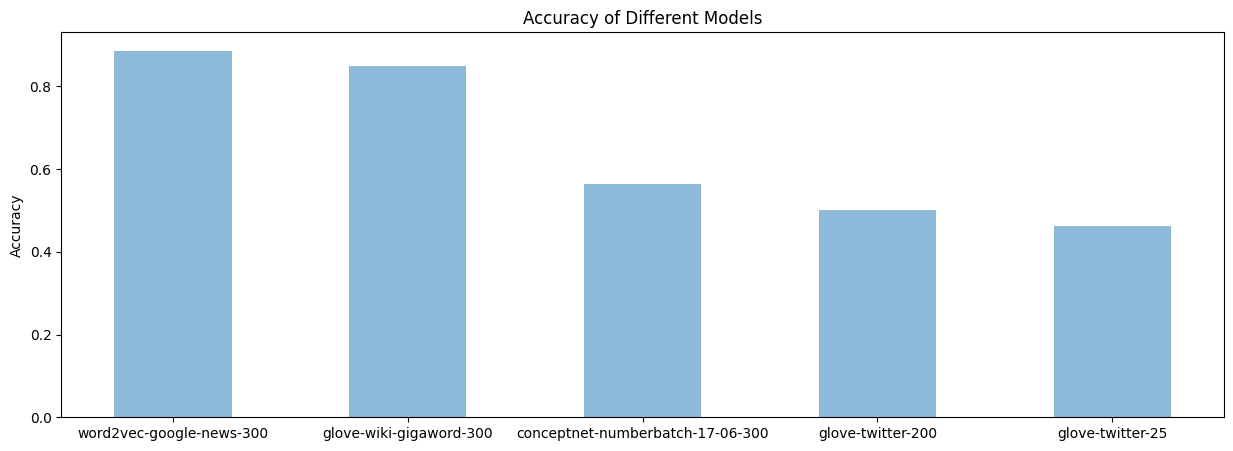

In [24]:
# Task 2 accuracy graph

objects = ('word2vec-google-news-300', 'glove-wiki-gigaword-300', 'conceptnet-numberbatch-17-06-300', 'glove-twitter-200', 'glove-twitter-25')
y_pos = np.arange(len(objects))
performance = [accuracy, accuracyC1E1, accuracyC2E1, accuracyC3E2, accuracyC3E3]

plt.figure(figsize=(15,5))
plt.bar(y_pos, performance, align='center', alpha=0.5, width = 0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

plt.show()

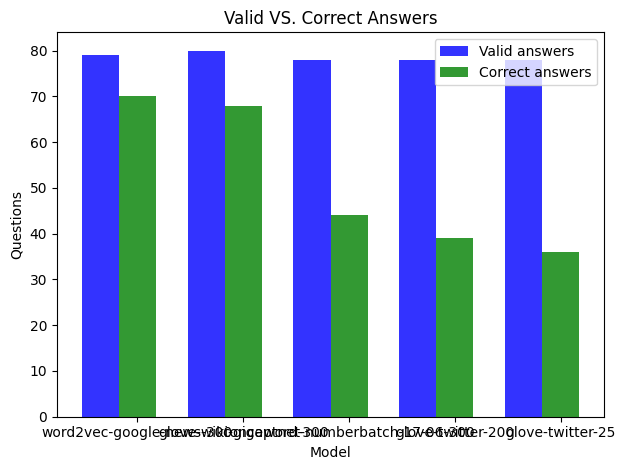

In [25]:
# Task 2 correct vs valid graph

groups = 5
correctList = (correct, correctC1E1, correctC2E1, correctC3E2, correctC3E3)
validList = (valid, validC1E1, validC2E1, validC3E2, validC3E3)

# Create plot
fig, ax = plt.subplots()
index = np.arange(groups)

rects1 = plt.bar(index, validList, 0.35, alpha=0.8, color='b', label='Valid answers')
rects2 = plt.bar(index + 0.35, correctList, 0.35, alpha=0.8, color='g', label='Correct answers')

plt.xlabel('Model')
plt.ylabel('Questions')
plt.title('Valid VS. Correct Answers')
plt.xticks(index + 0.35, objects)
plt.legend()
#plt.figure(figsize=(15,5))

plt.tight_layout()
plt.show()



In [90]:
# ------- Task 3 -------

# -- Load and preprocess each book --

def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

def preprocess_text(text):
    # Split the text into a list of sentences
    sentences = sent_tokenize(text) 
    
    # Split each sentence into a list of words, resulting in a list of lists of words
    sentences_words = [word_tokenize(sentence.lower()) for sentence in sentences]
    
    return sentences_words

book_paths = [
    'gutenberg/Title- In Bad Company, and other stories Author- Rolf Boldrewood.txt',
    'gutenberg/Title- Pride and Prejudice Author- Jane Austen.txt',
    'gutenberg/Title- The Great Gatsby Author- F. Scott Fitzgerald.txt',
    'gutenberg/Title- Working North from Patagonia Author- Harry Alverson Franck .txt',
    'gutenberg/Title- The Way We Live Now Author- Anthony Trollope.txt',
    'gutenberg/Title- Moby Dick; Or, The Whale Author- Herman Melville.txt',
    'gutenberg/Title- The party battles of the Jackson period Author- Claude G. Bowers.txt'
]

books = [read_file(book_file) for book_file in book_paths]

# Preprocess all books and append all of their sentences to a single list
all_sentences = []
for book in books:
    all_sentences.extend(preprocess_text(book))

In [91]:
# -- Train Word2Vec models from our sentences --

# Try 2 different window sizes, and 2 different embedding sizes
window_sizes = [5, 10]
embedding_sizes = [100, 300]

custom_models = []
for window_size in window_sizes:
    for embedding_size in embedding_sizes:
        model = Word2Vec(sentences=all_sentences,
                         window=window_size, vector_size=embedding_size)
        custom_models.append(model)

In [92]:
# -- Create and update csv files --

def compute_synonyms(model, output_path):
    correct = 0 # variable to count correct guess words
    valid = 0 # variable to count valid guess words
    
    # Open synonym.csv in read mode
    with open('synonym.csv', mode='r') as dataset:
    
        csv_reader = csv.reader(dataset, delimiter=',')
        line_count = 0 # variable to count number of lines
        
        # Open word2vec-google-news-300-details.csv in write mode
        with open(output_path, mode='w', newline='') as details:
            csv_writer = csv.writer(details)
    
            # For every row in synonym.csv
            for row in csv_reader:
                # csv Headings
                if line_count == 0:
                    csv_writer.writerow(['question-word', 'answer-word', 'guess-word', 'label'])
                else:
                    score_dict = {} # dictionary for score-word pairs
                    random_word = random.randint(2,5) # random integer between 2 and 5 (inclusive)
    
                    # If either question-word or all four guess-words are not in model, guess randomly
                    if row[0] not in model or (row[2] not in model and row[3] not in model and row[4] not in model and row[5] not in model):
                        in_model = False
                        guess_word = row[random_word]
    
                    else: 
                        in_model = True
    
                        # Compute similarities of scores of question-word and guess-word and append them as key-value pairs to the dictionary
                        for i in range(2, 6):
                            if row[i] in model:
                                score = model.similarity(row[0], row[i])
                                score_dict[score] = row[i]
    
                        # Get the word with the highest score
                        guess_word = score_dict[max(score_dict)]
    
                    # Label the system's guess
                    if not in_model:
                        label = "guess"
                    elif guess_word == row[1]:
                        correct += 1
                        valid += 1
                        label = "correct"
                    else:
                        valid += 1
                        label = "wrong"
    
                    csv_writer.writerow([row[0], row[1], guess_word, label]) # write final result to csv
                
                line_count += 1

    return correct, valid

for custom_model in custom_models:
    model_name  = f'word2vec-custom-E{custom_model.vector_size}-W{custom_model.window}'
    correct_count, valid_count = compute_synonyms(custom_model.wv, f'{model_name}.csv')
    
    # Open analysis.csv in append mode
    with open('analysis.csv', mode='a', newline='') as details:
            csv_writer = csv.writer(details)
            vocab_size = len(custom_model.wv.key_to_index)
            accuracy_ = correct_count/valid_count
            csv_writer.writerow([model_name, vocab_size, correct_count, valid_count, accuracy_]) # analysis results
            csv_writer.writerow("")
